# Assignment - 18 Forecasting (Coca Cola)

## Import necessary libraries

In [1]:
import pandas as pd

from matplotlib import pyplot as plt

import seaborn as sns

import statsmodels.formula.api as smf

import numpy as np

import warnings
warnings.filterwarnings('ignore')

## Import data

In [2]:
cocacola = pd.read_excel(r'D:\Downloads\CocaCola_Sales_Rawdata.xlsx')
cocacola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


## Data understanding

In [3]:
cocacola.shape

(42, 2)

In [4]:
cocacola.isna().sum()

Quarter    0
Sales      0
dtype: int64

In [5]:
cocacola.dtypes

Quarter     object
Sales      float64
dtype: object

Text(0.5, 1.0, 'sale in Quarter')

<Figure size 1080x720 with 0 Axes>

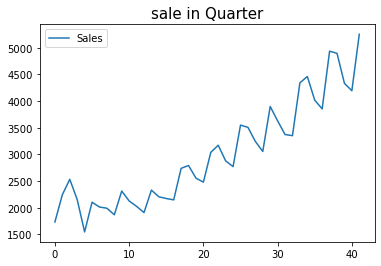

In [6]:
plt.figure(figsize=(15,10))
cocacola.plot()
plt.title('sale in Quarter', size=15)

## Model Preparation

In [7]:
cocacola['date'] = (pd.to_datetime(cocacola['Quarter'].str.split('_').apply(lambda x: ''.join(x[::-1]))))
cocacola

,Quarter,Sales,date
0,Q1_86,1734.827000,2086-01-01
1,Q2_86,2244.960999,2086-04-01
2,Q3_86,2533.804993,2086-07-01
3,Q4_86,2154.962997,2086-10-01
4,Q1_87,1547.818996,2087-01-01
5,Q2_87,2104.411995,2087-04-01
6,Q3_87,2014.362999,2087-07-01
7,Q4_87,1991.746998,2087-10-01
8,Q1_88,1869.049999,2088-01-01
9,Q2_88,2313.631996,2088-04-01


In [8]:
cocacola.dtypes

Quarter            object
Sales             float64
date       datetime64[ns]
dtype: object

In [9]:
cocacola['Months']=cocacola['date'].dt.strftime('%b')
cocacola['Year']=cocacola['date'].dt.strftime('%Y')
cocacola

,Quarter,Sales,date,Months,Year
0,Q1_86,1734.827000,2086-01-01,Jan,2086
1,Q2_86,2244.960999,2086-04-01,Apr,2086
2,Q3_86,2533.804993,2086-07-01,Jul,2086
3,Q4_86,2154.962997,2086-10-01,Oct,2086
4,Q1_87,1547.818996,2087-01-01,Jan,2087
5,Q2_87,2104.411995,2087-04-01,Apr,2087
6,Q3_87,2014.362999,2087-07-01,Jul,2087
7,Q4_87,1991.746998,2087-10-01,Oct,2087
8,Q1_88,1869.049999,2088-01-01,Jan,2088
9,Q2_88,2313.631996,2088-04-01,Apr,2088


### Year wise distribution

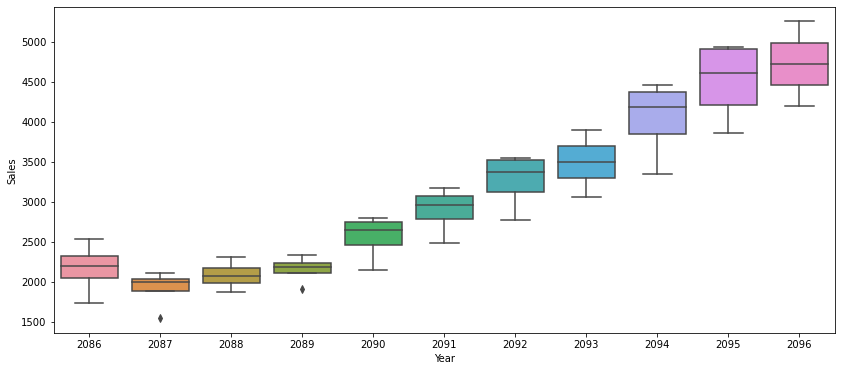

In [10]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Year',y='Sales',data=cocacola)
plt.show()

### Month wise distribution

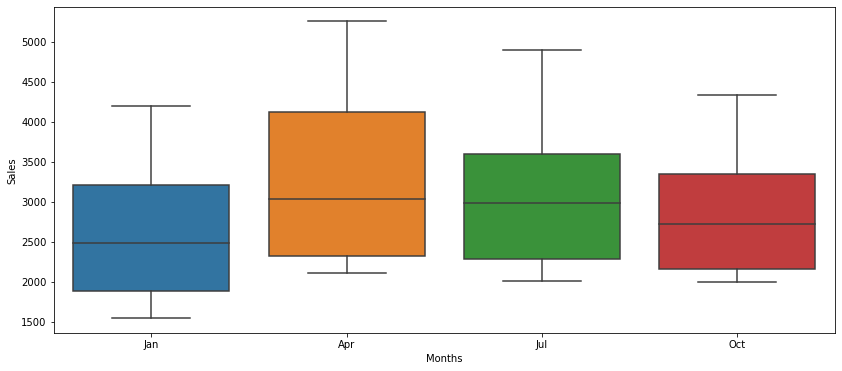

In [11]:
plt.figure(figsize=(14,6))
sns.boxplot(x='Months',y='Sales',data=cocacola)
plt.show()

In [12]:
cocacola1=pd.pivot_table(data=cocacola,values='Sales',index='Year',columns='Months').fillna(0)
cocacola1

Months,Apr,Jan,Jul,Oct
Year,,,,
2086,2244.960999,1734.827000,2533.804993,2154.962997
2087,2104.411995,1547.818996,2014.362999,1991.746998
2088,2313.631996,1869.049999,2128.320000,2026.828999
2089,2331.164993,1910.603996,2206.549995,2173.967995
2090,2739.307999,2148.278000,2792.753998,2556.009995
2091,3039.522995,2480.973999,3172.115997,2879.000999
2092,3550.000000,2772.000000,3508.000000,3243.859993
2093,3899.000000,3056.000000,3629.000000,3373.000000
2094,4342.000000,3352.000000,4461.000000,4017.000000


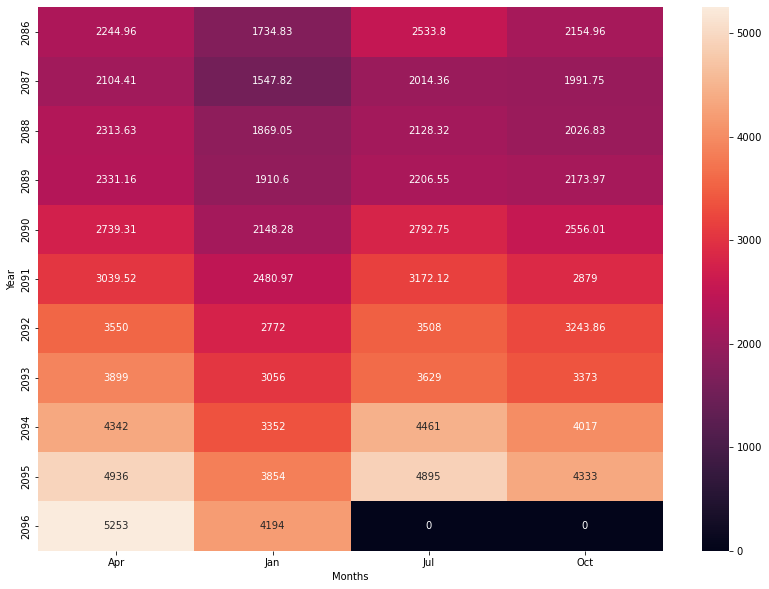

In [13]:
plt.figure(figsize=(14,10))
sns.heatmap(cocacola1,annot=True,fmt='g')
plt.show()

## Model Building

In [14]:
cocacola.shape

(42, 5)

In [15]:
dumies = pd.DataFrame(pd.get_dummies(cocacola.Months))

In [16]:
cocacola = pd.concat([cocacola,dumies],axis=1)

In [17]:
cocacola['t']=range(1,43)

In [18]:
cocacola['t_square'] = cocacola.t*cocacola.t

In [19]:
cocacola['log_Sales'] = np.log(cocacola.Sales)

In [20]:
cocacola

,Quarter,Sales,date,Months,Year,Apr,Jan,Jul,Oct,t,t_square,log_Sales
0,Q1_86,1734.827000,2086-01-01,Jan,2086,0,1,0,0,1,1,7.458663
1,Q2_86,2244.960999,2086-04-01,Apr,2086,1,0,0,0,2,4,7.716443
2,Q3_86,2533.804993,2086-07-01,Jul,2086,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,2086-10-01,Oct,2086,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,2087-01-01,Jan,2087,0,1,0,0,5,25,7.344602
5,Q2_87,2104.411995,2087-04-01,Apr,2087,1,0,0,0,6,36,7.651791
6,Q3_87,2014.362999,2087-07-01,Jul,2087,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,2087-10-01,Oct,2087,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,2088-01-01,Jan,2088,0,1,0,0,9,81,7.533186
9,Q2_88,2313.631996,2088-04-01,Apr,2088,1,0,0,0,10,100,7.746574


In [21]:
train_data=cocacola.head(35)

In [22]:
test_data=cocacola.tail(7)

In [23]:
train_data.shape

(35, 12)

In [24]:
test_data.shape

(7, 12)

## Model training // Model testing // Model evaluation

### Model 1 - Linear

In [25]:
cocacola2=smf.ols('Sales~t',data =train_data).fit()
cocacola3=cocacola2.predict(test_data['t'])
linear=np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(cocacola3))**2))
linear

636.5072930351146

### Model 2 - Exponential

In [26]:
cocacola5=smf.ols('log_Sales~t',data =train_data).fit()
cocacola6=cocacola5.predict(test_data['t'])
exponential=np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(np.exp(cocacola6)))**2))
exponential

493.34864848421955

### Model 3 - Quadratic model

In [27]:
cocacola8=smf.ols('Sales~t+t_square',data =train_data).fit()
cocacola9=cocacola8.predict(test_data[['t','t_square']])
quad_mod=np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(cocacola9))**2))
quad_mod

511.8117319417333

### Model 4 - Additive model

In [28]:
cocacola11=smf.ols('Sales~Apr+Jan+Jul+Oct',data =train_data).fit()
cocacola12=cocacola11.predict(test_data[['Apr','Jan','Jul','Oct']])
add_mod=np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(cocacola12))**2))
add_mod

1861.8704164251753

### Model 5 - Additive model quadratic

In [29]:
cocacola14=smf.ols('Sales~t+t_square+Apr+Jan+Jul+Oct',data =train_data).fit()
cocacola15=cocacola14.predict(test_data[['t','t_square','Apr','Jan','Jul','Oct']])
add_mod_quad=np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(cocacola15))**2))
add_mod_quad

309.46413951634094

### Model 6 - Multiplicative seasonality

In [30]:
cocacola17=smf.ols('log_Sales~Apr+Jan+Jul+Oct',data =train_data).fit()
cocacola18=cocacola17.predict(test_data[['Apr','Jan','Jul','Oct']])
multi_seas=np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(np.exp(cocacola18)))**2))
multi_seas

1938.933235196622

### Model 7 - Multiplicative additive seasonality

In [31]:
cocacola20=smf.ols('log_Sales~t+Apr+Jan+Jul+Oct',data =train_data).fit()
cocacola21=cocacola20.predict(test_data[['t','Apr','Jan','Jul','Oct']])
multi_add_seas=np.sqrt(np.mean((np.array(test_data['Sales'])-np.array(np.exp(cocacola21)))**2))
multi_add_seas

339.1874666994744

## Compare the results

In [32]:
cocacola23={"MODEL":pd.Series(["linear","exponential","quad_mod","add_mod","add_mod_quad","multi_seas","multi_add_seas"]),
           "RMSE Values":pd.Series([linear,exponential,quad_mod,add_mod,add_mod_quad,multi_seas,multi_add_seas])}
cocacola24=pd.DataFrame(cocacola23)
cocacola24.sort_values(["RMSE Values"])

,MODEL,RMSE Values
4,add_mod_quad,309.464140
6,multi_add_seas,339.187467
1,exponential,493.348648
2,quad_mod,511.811732
0,linear,636.507293
3,add_mod,1861.870416
5,multi_seas,1938.933235
